# Análisis de textos mediante métricas

En este cuaderno usaremos 4 libros clásicos en español para los ejemplos. Los ficheros de texto han sido obtenidos de la web https://www.gutenberg.org/, concretamente:
* __Niebla__ de Miguel de Unamuno (https://www.gutenberg.org/ebooks/49836)
* __El anacronópete__ de Enrique Gaspar (https://www.gutenberg.org/ebooks/62359)
* __El libro de las mil noches y una noche__, tomo 1, traducido por Vicente Blasco Ibáñez y J. C. Mardrus (https://www.gutenberg.org/ebooks/47287)
* __El árbol de la ciencia__ de Pío Baroja (https://www.gutenberg.org/ebooks/60464)

Los ficheros originales han sido editados para dejar únicamente el texto del libro, quitando prólogos, notas a pie de página, marcas de formato, índices, etc.


---


**IMPORTANTE:**
Si vas a ejecutar este cuaderno Jupyter en Google Colab, debes subir los 4 ficheros al área de _Archivos_ del entorno de ejecución. Para ello debes abrir primero el área de _Archivos_ que está en el margen izquierdo del cuaderno en Google Colab (icono de la carpeta) y arrastrar allí los 4 ficheros de extension __txt__ descargados de https://github.com/RafaelCaballero/HumanidadesDigitales/tree/main/capítulo6. Como los entornos de ejecución de Google Colab se destruyen pasado un tiempo, deberás repetir el proceso de copia de ficheros cada vez que reinicies o generes un nuevo entorno de ejecución.

## Introducción

In [ ]:
# Instala paquetes
!pip install spacy==3.4.2
!pip install textdescriptives==2.4.5

!pip install seaborn==0.12.2

In [2]:
# Instala la tubería de SpacCy para español. 

!python -m spacy download es_core_news_lg

2023-04-21 11:07:44.909012: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-21 11:07:48.833937: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 2.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [3]:
# Carga spaCy activando todas las medidas de textdescriptives

import spacy
import textdescriptives

nlp = spacy.load("es_core_news_lg")
nlp.add_pipe("textdescriptives/all")

# Como vamos a procesar libros completos, que son muy largos, desactivaremos
# el análisis de entidades con nombre porque no lo vamos a usar y haría el
# proceso más lento
nlp.disable_pipes('ner')

['ner']

In [4]:
# Carga ficheros como cadenas de texto y los procesa con SpaCy y texdescriptives
# Puede tardar varios minutos porque está procesando 4 libros completos

def carga_fichero(ruta):
    ''' Función que carga un fichero de texto y lo procesa completo con SpaCy
        Usa el objeto nlp construido en la celda anterior
    '''
    with open(ruta, 'r', encoding='UTF-8') as fichero:
        cadena = fichero.read()
        return nlp(cadena)
    
niebla = carga_fichero('niebla.txt')
anacronopete = carga_fichero('anacronopete.txt')
mil_noches = carga_fichero('mil_y_una_noches_t1.txt')
arbol_ciencia = carga_fichero('arbol_ciencia.txt')

/usr/local/lib/python3.9/dist-packages/textdescriptives/components/coherence.py:44: UserWarning: [W008] Evaluating Span.similarity based on empty vectors.
  similarities.append(sent.similarity(sents[i + order]))
/usr/local/lib/python3.9/dist-packages/textdescriptives/components/information_theory.py:37: RuntimeWarning: overflow encountered in exp
  return np.exp(entropy)


## Estadística descriptiva

In [5]:
# Ejemplo 6.2.1
# Obtención de las métricas de estadística descriptiva del libro «Niebla»

# Diccionario de conteos
print(niebla._.counts)

# Diccionario de longitud de frases
print(niebla._.sentence_length)

# Diccionario de sílabas
print(niebla._.syllables)

# Diccionario de longitud de tokens
print(niebla._.token_length)

{'n_tokens': 59083, 'n_unique_tokens': 7385, 'proportion_unique_tokens': 0.12499365299663186, 'n_characters': 251508, 'n_sentences': 3512}
{'sentence_length_mean': 16.823177676537586, 'sentence_length_median': 11.0, 'sentence_length_std': 17.873234284750712}
{'syllables_per_token_mean': 1.6664015029703976, 'syllables_per_token_median': 1.0, 'syllables_per_token_std': 0.9557051148406688}
{'token_length_mean': 3.9713453954606233, 'token_length_median': 3.0, 'token_length_std': 2.6067269582053623}


In [6]:
# Ejemplo 6.2.2
# Acceso a medidas concretas de estadística descriptiva

# Longitud media de las frase en "Niebla"
print(niebla._.sentence_length['sentence_length_mean'])

# Número promedio de sílabas por token en "El anacronópete"
print(anacronopete._.syllables['syllables_per_token_mean'])

# Número de frases en "El árbol de la ciencia"
print(arbol_ciencia._.counts['n_sentences'])

16.823177676537586
1.9005847953216375
5626


## Facilidad de lectura

In [7]:
# Ejemplo 6.3.1
# Acceso a métricas de facilidad de lectura de «Niebla»

# Los modelos flesch_reading_ease, flesch_kincaid_grade, smog, gunning_fog, automated_readability_index  y coleman_liau_index
# están diseñados para el inglés, por lo que su aplicación directa al español no es lo más adecuado
# lix y rix no se basan en el conteo de sílabas, lo que las hace más adecuadas para idiomas diferentes del inglés

print(niebla._.readability)

{'flesch_reading_ease': 48.78190750701873, 'flesch_kincaid_grade': 10.634577028900349, 'smog': 12.92523520746051, 'gunning_fog': 13.720791474115197, 'automated_readability_index': 5.686625650888331, 'coleman_liau_index': 5.792033579879153, 'lix': 34.16319087830459, 'rix': 2.9171412300683373}


In [8]:
# Ejemplo 6.3.2. 
# Índice de facilidad de lectura de Fernández Huerta

# Coeficiente de facilidad lectora de José Fernández Huerta (1959)
# Diseñado específicamente para el español
#
#                L = 206.84 -60*P -1.02*F
#
# L es la lecturabilidad
# P es el promedio de sílabas por palabra 
# F es la media de palabras por frase
# 
# Descripción del nivel estimado de grado de facilidad lectora
# 
#  0-30   Muy difícil (graduado de universidad)
# 30-50   Difícil 
# 50-60   Moderadamente difícil 
# 60-70   Normal 
# 70-80   Moderadamente fácil 
# 80-90   Fácil
# 90-100  Muy fácil 

def coeficiente_facilidad_lectora(doc):
    ''' Coeficiente de facilidad lectora de José Fernández Huerta (1959) '''
    p = doc._.syllables['syllables_per_token_mean']
    f = doc._.sentence_length['sentence_length_mean']
    return 206.84 - 60*p - 1.02*f

# Facilidad lectora de los 4 libros
print('Niebla:', coeficiente_facilidad_lectora(niebla))
print('Anacronópete:', coeficiente_facilidad_lectora(anacronopete))
print('1001 noches:', coeficiente_facilidad_lectora(mil_noches))
print('El árbol de la ciencia:', coeficiente_facilidad_lectora(arbol_ciencia))

Niebla: 89.69626859170782
Anacronópete: 74.02898040409508
1001 noches: 81.4429261082637
El árbol de la ciencia: 84.74452518851975


## Distancia de dependencia

In [9]:
# Ejemplo 6.4.1
# Distancia de dependencia de una frase

doc = nlp('Yo lanzo el balón')
spacy.displacy.render(doc, style='dep', jupyter=True)
print(doc._.dependency_distance)

{'dependency_distance_mean': 1.0, 'dependency_distance_std': 0.0, 'prop_adjacent_dependency_relation_mean': 0.5, 'prop_adjacent_dependency_relation_std': 0.0}


In [10]:
# Ejemplo 6.4.1 (continuación)

for token in doc:
    print(token, token._.dependency_distance)

Yo {'dependency_distance': 1, 'adjacent_dependency': True}
lanzo {'dependency_distance': 0, 'adjacent_dependency': False}
el {'dependency_distance': 1, 'adjacent_dependency': True}
balón {'dependency_distance': 2, 'adjacent_dependency': False}


In [11]:
# Ejemplo 6.4.2
# Distancia de dependencia de los libros

print('Niebla')
print(niebla._.dependency_distance)

print('El anacronópete')
print(anacronopete._.dependency_distance)

print('Las mil y una noches, tomo 1')
print(mil_noches._.dependency_distance)

print('El árbol de la ciencia')
print(arbol_ciencia._.dependency_distance)

Niebla
{'dependency_distance_mean': 2.659600544389479, 'dependency_distance_std': 1.8402926441071663, 'prop_adjacent_dependency_relation_mean': 0.3143449516552605, 'prop_adjacent_dependency_relation_std': 0.16138607998465837}
El anacronópete
{'dependency_distance_mean': 2.0691764223874625, 'dependency_distance_std': 1.6718068666219252, 'prop_adjacent_dependency_relation_mean': 0.2909091751564863, 'prop_adjacent_dependency_relation_std': 0.19305042900655767}
Las mil y una noches, tomo 1
{'dependency_distance_mean': 3.097740338847526, 'dependency_distance_std': 1.4581408013623287, 'prop_adjacent_dependency_relation_mean': 0.3474156072029437, 'prop_adjacent_dependency_relation_std': 0.11437743248551019}
El árbol de la ciencia
{'dependency_distance_mean': 1.83378321948032, 'dependency_distance_std': 1.5382077972677806, 'prop_adjacent_dependency_relation_mean': 0.2766476838164316, 'prop_adjacent_dependency_relation_std': 0.19959856852608712}


## Proporción de categorías gramaticales

In [12]:
# Ejemplo 6.5.1
# Proporción de categorías gramaticales en «Niebla»

print(niebla._.pos_proportions)

{'pos_prop_CCONJ': 0.03910847754359976, 'pos_prop_SPACE': 0.07549659955558548, 'pos_prop_ADP': 0.08857316005656185, 'pos_prop_VERB': 0.10776378695037371, 'pos_prop_PROPN': 0.031297555720153525, 'pos_prop_DET': 0.07889031041680696, 'pos_prop_NOUN': 0.10968958319305097, 'pos_prop_ADJ': 0.03672479967678944, 'pos_prop_PUNCT': 0.1995286512692748, 'pos_prop_ADV': 0.05304693286647364, 'pos_prop_AUX': 0.037680964244832, 'pos_prop_SCONJ': 0.03246919399367046, 'pos_prop_PRON': 0.10004713487307253, 'pos_prop_INTJ': 0.007043296747693758, 'pos_prop_NUM': 0.0024375462931789105, 'pos_prop_SYM': 6.733553296074339e-05, 'pos_prop_PART': 0.00013467106592148677}


In [13]:
########################################################
# Ejemplo adicional: ordenar categorías por porcentaje #
########################################################
sorted(niebla._.pos_proportions.items(), key=lambda item: item[1], reverse=True)

[('pos_prop_PUNCT', 0.1995286512692748),
 ('pos_prop_NOUN', 0.10968958319305097),
 ('pos_prop_VERB', 0.10776378695037371),
 ('pos_prop_PRON', 0.10004713487307253),
 ('pos_prop_ADP', 0.08857316005656185),
 ('pos_prop_DET', 0.07889031041680696),
 ('pos_prop_SPACE', 0.07549659955558548),
 ('pos_prop_ADV', 0.05304693286647364),
 ('pos_prop_CCONJ', 0.03910847754359976),
 ('pos_prop_AUX', 0.037680964244832),
 ('pos_prop_ADJ', 0.03672479967678944),
 ('pos_prop_SCONJ', 0.03246919399367046),
 ('pos_prop_PROPN', 0.031297555720153525),
 ('pos_prop_INTJ', 0.007043296747693758),
 ('pos_prop_NUM', 0.0024375462931789105),
 ('pos_prop_PART', 0.00013467106592148677),
 ('pos_prop_SYM', 6.733553296074339e-05)]

## Coherencia

In [14]:
# Ejemplo 6.6.1
# Coherencia de dos textos

doc1 = nlp('El balón es blanco. Juan pedirá pizza para cenar. Ayer fui al cine.')
doc2 = nlp('Primero se lavan las patatas. Luego se pelan las patatas. Finalmente, se cocinan a fuego lento en una sartén.')

print(doc1._.coherence)
print(doc2._.coherence) # Es bastante más coherente que el primero

{'first_order_coherence': 0.2370069921016693, 'second_order_coherence': 0.3022197484970093}
{'first_order_coherence': 0.8403817415237427, 'second_order_coherence': 0.6957200169563293}


In [15]:
# Ejemplo 6.6.2
# Coherencia de los libros

print('Niebla')
print(niebla._.coherence)

print('El anacronópete')
print(anacronopete._.coherence)

print('Las mil y una noches, tomo 1')
print(mil_noches._.coherence)

print('El árbol de la ciencia')
print(arbol_ciencia._.coherence)

Niebla
{'first_order_coherence': 0.35418888906293344, 'second_order_coherence': 0.4101849088690574}
El anacronópete
{'first_order_coherence': 0.23488745780653975, 'second_order_coherence': 0.34312385647348803}
Las mil y una noches, tomo 1
{'first_order_coherence': 0.502946326650489, 'second_order_coherence': 0.4916409922283844}
El árbol de la ciencia
{'first_order_coherence': 0.20012292442774504, 'second_order_coherence': 0.3851610925896244}


## Visualización de los análisis

In [16]:
import seaborn as sns
import pandas as pd

# Establecemos el tema de colores de seaborn a su
# valor por defecto: fuente sans-serif y paleta 'deep'
sns.set_theme()

### Creación de tablas en pandas

In [17]:
# Ejemplo 6.7.1
# Creación de una tabla con una columna

# Creación de una tabla con varias filas y una única columna
# Resultados de tirar un dado 5 veces

datos = [5,3,5,1,4,6]
df_dado = pd.DataFrame(datos, columns =['Resultado'])
df_dado

# Para almacenar tabla como PNG
# dfi.export(df_dado, "df_dado.png", dpi=300)

,Resultado
0,5
1,3
2,5
3,1
4,4
5,6


In [18]:
# Ejemplo 6.7.2
# Creación de una tabla con varias columnas


# Capitales de países
datos = [['España', 'Madrid', 657],
         ['Canadá', 'Ottawa', 70],
         ['Venezuela', 'Caracas', 1037],
         ['Japón', 'Tokio', 6],
         ['Nueva Zelanda','Wellington',1],
         ['Botsuana', 'Gaborone', 1014]
    ]
    
df_capitales = pd.DataFrame(datos, columns =['País', 'Capital', 'Altura capital'])
df_capitales

# Para almacenar tabla como PNG
# dfi.export(df_capitales, "df_capitales.png", dpi=300)

,País,Capital,Altura capital
0,España,Madrid,657
1,Canadá,Ottawa,70
2,Venezuela,Caracas,1037
3,Japón,Tokio,6
4,Nueva Zelanda,Wellington,1
5,Botsuana,Gaborone,1014


In [19]:
# Ejemplo 6.7.3
# Creación de una tabla con varias columnas y con índices

# Creación de una tabla con varias filas y varias columna
# pero estableciendo etiquetas para los índices de filas

# Capitales de países
datos = [['Madrid', 657],
         ['Ottawa', 70],
         ['Caracas', 1037],
         ['Tokio', 6],
         ['Wellington',1],
         ['Gaborone', 1014]
        ]

df_capitales2 = pd.DataFrame(datos, 
    columns =['Capital', 'Altura capital'],
    index=['España', 'Canadá', 'Venezuela', 'Japón', 'Nueva Zelanda', 'Botsuana'])
df_capitales2
    
# Para almacenar tabla como PNG
# dfi.export(df_capitales2, "df_capitales2.png", dpi=300)

,Capital,Altura capital
España,Madrid,657
Canadá,Ottawa,70
Venezuela,Caracas,1037
Japón,Tokio,6
Nueva Zelanda,Wellington,1
Botsuana,Gaborone,1014


In [20]:
# Importamos las bibliotecas necesarias
import seaborn as sns
import pandas as pd

# !pip install dataframe_image
# import dataframe_image as dfi  # Para salvar DataFrames como imágenes

### Diagrama de barras de la longitud de las frases

In [21]:
# Ejemplo 6.7.4
# Diagrama de barras verticales de la longitud de las frases de cada libro

# Crear tabla (DataFrame) con los datos a mostrar
datos = [['Niebla', niebla._.sentence_length['sentence_length_mean']],
         ['Anacronópete', anacronopete._.sentence_length['sentence_length_mean']],
         ['1001 noches', mil_noches._.sentence_length['sentence_length_mean']],
         ['Árbol de la ciencia', arbol_ciencia._.sentence_length['sentence_length_mean']]
        ]
df_long_frases = pd.DataFrame(datos, columns =['Libro', 'Promedio de palabras por frase'])
df_long_frases

# Almacenar el DataFrame en una imagen
# dfi.export(df_long_frases, "df_long_frases.png", dpi=300)

,Libro,Promedio de palabras por frase
0,Niebla,16.823178
1,Anacronópete,18.407776
2,1001 noches,23.493575
3,Árbol de la ciencia,12.268930


Text(0.5, 1.0, 'Palabras por frase en libros')

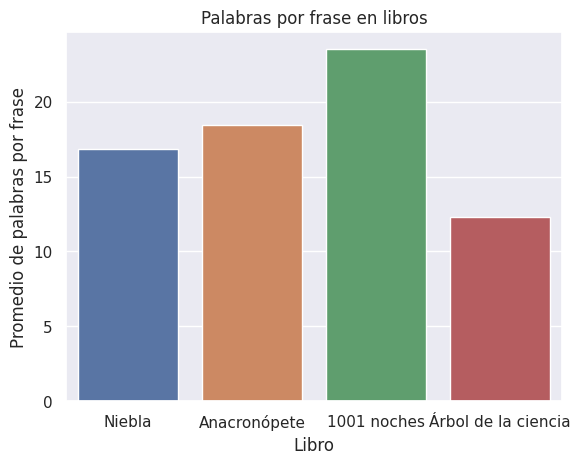

In [22]:
# Construir y mostrar el diagrama de barras 
plot = sns.barplot(data=df_long_frases, x="Libro", y="Promedio de palabras por frase")
plot.set_title('Palabras por frase en libros')

# Además lo guardamos en un fichero
# plot.get_figure().savefig("palabras_frase.pdf")

Text(0.5, 1.0, 'Palabras por frase en libros')

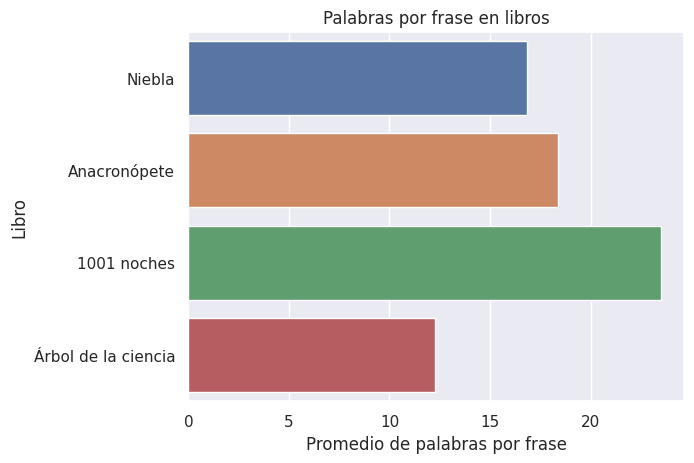

In [23]:
# Ejemplo 6.7.5
# Diagrama de barras horizontales de la longitud de las frases de cada libro

plot = sns.barplot(data=df_long_frases,
         y="Libro",
         x="Promedio de palabras por frase")
plot.set_title('Palabras por frase en libros')

### Diagrama de barras de varias medidas

In [24]:
# Ejemplo 6.7.6
# Diagrama de barras verticales de la longitud de las frases de cada libro

# Diagrama de barras con la longitud promedio de frases, candidad promedio de
# sílabas por palabra y longitud promedio de las palabras.

datos = [['Niebla', 'Longitud frase',
           niebla._.sentence_length['sentence_length_mean']],
         ['Niebla', 'Sílabas palabra',
           niebla._.syllables['syllables_per_token_mean']],
         ['Niebla', 'Longitud palabra',
           niebla._.token_length['token_length_mean'],],

         ['Anacronópete', 'Longitud frase',
           anacronopete._.sentence_length['sentence_length_mean']],
         ['Anacronópete', 'Sílabas palabra',
           anacronopete._.syllables['syllables_per_token_mean']],
         ['Anacronópete', 'Longitud palabra',
           anacronopete._.token_length['token_length_mean']],

         ['1001 noches', 'Longitud frase',
           mil_noches._.sentence_length['sentence_length_mean']],
         ['1001 noches', 'Sílabas palabra',
           mil_noches._.syllables['syllables_per_token_mean']],
         ['1001 noches', 'Longitud palabra',
           mil_noches._.token_length['token_length_mean']],

         ['Árbol de la ciencia', 'Longitud frase',
           arbol_ciencia._.sentence_length['sentence_length_mean']],
         ['Árbol de la ciencia', 'Sílabas palabra',
           arbol_ciencia._.syllables['syllables_per_token_mean']],
         ['Árbol de la ciencia', 'Longitud palabra',
           arbol_ciencia._.token_length['token_length_mean']]
]

df_promedios = pd.DataFrame(datos, columns =['Libro', 'Tipo medida', 'Valor promedio'])
df_promedios

# Almacenar el DataFrame en una imagen
# dfi.export(df_promedios, "df_promedios.png", dpi=300)

,Libro,Tipo medida,Valor promedio
0,Niebla,Longitud frase,16.823178
1,Niebla,Sílabas palabra,1.666402
2,Niebla,Longitud palabra,3.971345
3,Anacronópete,Longitud frase,18.407776
4,Anacronópete,Sílabas palabra,1.900585
5,Anacronópete,Longitud palabra,4.541887
6,1001 noches,Longitud frase,23.493575
7,1001 noches,Sílabas palabra,1.690560
8,1001 noches,Longitud palabra,4.115694
9,Árbol de la ciencia,Longitud frase,12.268930


Text(0.5, 1.0, 'Valores promedios por libro')

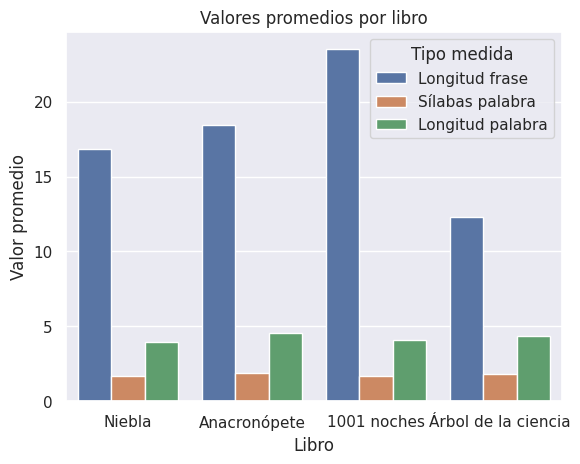

In [25]:
plot = sns.barplot(x='Libro', y='Valor promedio', hue='Tipo medida', data=df_promedios) 
plot.set_title('Valores promedios por libro')

# Además lo guardamos en un fichero
# plot.get_figure().savefig("promedios_por_libro.pdf")

### Histograma de longitudes de frase

In [26]:
# Ejemplo 6.7.7
# Histograma de longitudes de frase en «Niebla»

def extraer_longitudes_frases(doc):
    ''' Genera la lista de longitudes de las frases (número de palabras) de doc.
        Elimina palabras detectadas por spaCy que no sean alfabéticas, como los 
        signos de puntuación. También elimina aquellas frases que al eliminar 
        las palabras no alféticas se quedan vacías'''
    longitud = [len([palabra for palabra in frase if palabra.is_alpha ]) 
                for frase in doc.sents]
    return [long for long in longitud if long > 0]

# Generamos 4 tablas, una por cada libro. Cada tabla tendrá una única
# columna una fila por cada palabra indicando su longitud
columna = extraer_longitudes_frases(niebla)
df_niebla = pd.DataFrame(columna, columns =['Longitud frases'])
df_niebla

# Almacenar el DataFrame en una imagen
# dfi.export(df_niebla, "df_niebla.png", dpi=300, max_rows=11)

,Longitud frases
0,37
1,14
2,17
3,16
4,11
...,...
2867,6
2868,10
2869,32
2870,43


Text(0.5, 1.0, 'Histograma de longitud de frases en "Niebla"')

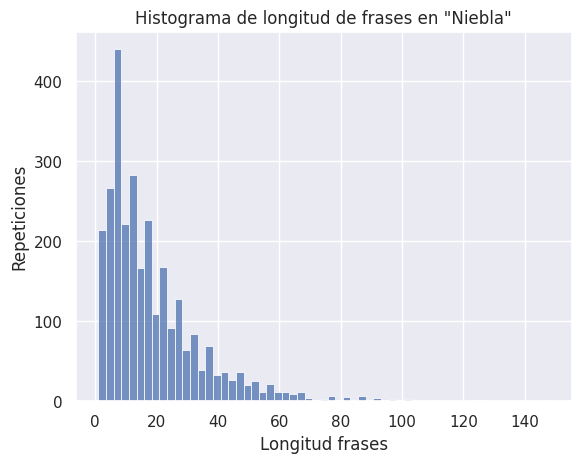

In [27]:
plot = sns.histplot(data=df_niebla, x="Longitud frases")
plot.set(ylabel = "Repeticiones")
# Con 'set(ylabel = "Repeticiones")' cambiamos la etiqueta del eje vertical
# de su valor por defecto "Count" a "Repeticiones"
plot.set_title('Histograma de longitud de frases en "Niebla"')

# Además lo guardamos en un fichero
# plot.get_figure().savefig("histograma_niebla.pdf")

### __Ejemplo adicional__: Histograma de longitud de las frases de los 4 libros



In [28]:
# Generamos 4 tablas, una por cada libro. Cada tabla tendrá una única
# columna con filas por cada frase indicando su longitud
columna = extraer_longitudes_frases(niebla)
df_niebla = pd.DataFrame(columna, columns =['Longitud frases'])

columna = extraer_longitudes_frases(anacronopete)
df_anacronopete = pd.DataFrame(columna, columns =['Longitud frases'])

columna = extraer_longitudes_frases(mil_noches)
df_milnoches = pd.DataFrame(columna, columns =['Longitud frases'])

columna = extraer_longitudes_frases(arbol_ciencia)
df_arbolciencia = pd.DataFrame(columna, columns =['Longitud frases'])

[Text(0, 0.5, 'Repeticiones')]

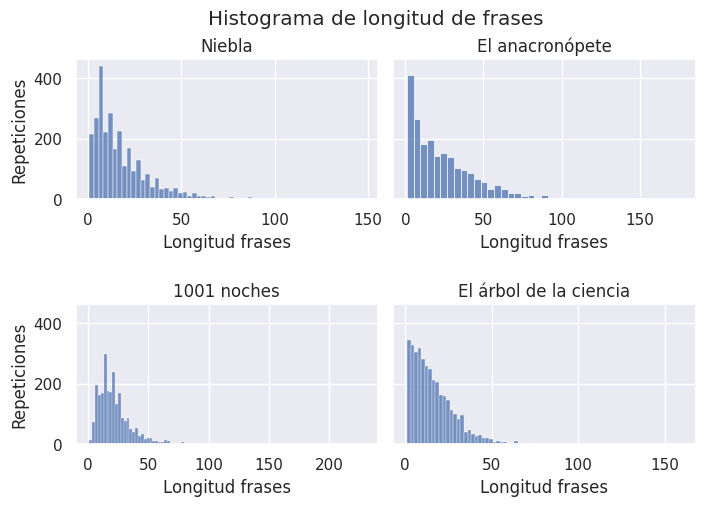

In [29]:
import matplotlib.pyplot as plt
# Cargamos matplotlib

# Generamos una figura con los 4 gráficos en una composición 2x2
# El gráfico superior izquierdo está en la coordenada (0,0)
# El gráfico superior derecho está en la coordenada (0,1)
# El gráfico inferior izquierdo está en la coordenada (1,0)
# El gráfico inferior derecho está en la coordenada (1,1)
fig, axes = plt.subplots(2, 2, figsize=(8, 5), sharey=True)
fig.suptitle('Histograma de longitud de frases')
fig.subplots_adjust(wspace=0.05, hspace=0.75)


# Establecemos el título de cada gráfico
axes[0,0].set_title('Niebla')
axes[0,1].set_title('El anacronópete')
axes[1,0].set_title('1001 noches')
axes[1,1].set_title('El árbol de la ciencia')


# Generamos el gráfico de cada libro y lo situamos en una de las 4 posiciones
plot1 = sns.histplot(data=df_niebla, x="Longitud frases", ax=axes[0,0])
plot1.set(ylabel = "Repeticiones")

plot2 = sns.histplot(data=df_anacronopete, x="Longitud frases", ax=axes[0,1])
plot2.set(ylabel = "Repeticiones")

plot3 = sns.histplot(data=df_milnoches, x="Longitud frases", ax=axes[1,0])
plot3.set(ylabel = "Repeticiones")

plot4 = sns.histplot(data=df_arbolciencia, x="Longitud frases", ax=axes[1,1])
plot4.set(ylabel = "Repeticiones")


# Además lo guardamos en un fichero
# fig.get_figure().savefig("palabras_frase.pdf")

### Diagrama de franjas sobre la distribución longitudes de frase

Text(0.5, 1.0, 'Distribución de longitud de frases en "Niebla"')

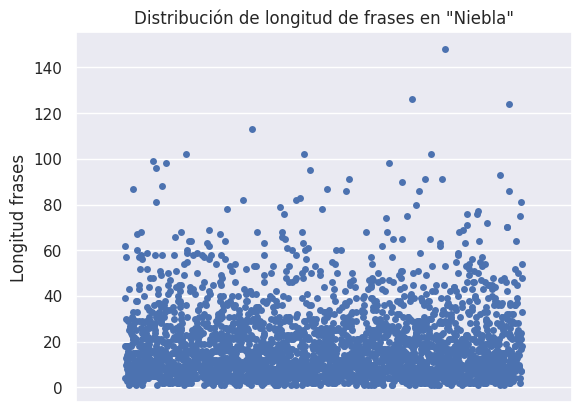

In [30]:
# Ejemplo 6.7.8
# Strip plot de longitudes de frase en Niebla

plot = sns.stripplot(data=df_niebla, y="Longitud frases", jitter=0.4)
plot.set_title('Distribución de longitud de frases en "Niebla"')

# Además lo guardamos en un fichero
# plot.get_figure().savefig("stripplot_long_frases_niebla.pdf")

In [31]:
########################################################
# Ejemplo adicional: strip plot de longitudes de frase #
# de los 4 libros                                      #
########################################################

def extraer_longitudes_frases_etiquetado(doc, etiqueta):
    return [(etiqueta, long) for long in extraer_longitudes_frases(doc)]

frases_niebla = extraer_longitudes_frases_etiquetado(niebla, 'Niebla')
frases_anacronopete = extraer_longitudes_frases_etiquetado(niebla, 'Anacronópete')
frases_mil_noches = extraer_longitudes_frases_etiquetado(mil_noches, '1001 noches')
frases_arbol_ciencia = extraer_longitudes_frases_etiquetado(arbol_ciencia, 'Árbol ciencia')

df_long_frases = pd.DataFrame(frases_niebla + frases_anacronopete + frases_mil_noches + frases_arbol_ciencia, 
                            columns =['Libro', 'Longitud frase'])
df_long_frases

,Libro,Longitud frase
0,Niebla,37
1,Niebla,14
2,Niebla,17
3,Niebla,16
4,Niebla,11
...,...,...
11857,Árbol ciencia,9
11858,Árbol ciencia,2
11859,Árbol ciencia,7
11860,Árbol ciencia,10


Text(0.5, 1.0, 'Distribución de longitud de frases por libros')

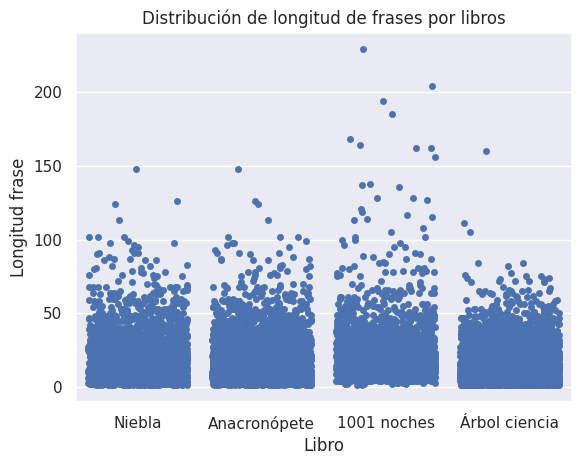

In [32]:
plot = sns.stripplot(data=df_long_frases, x="Libro", y="Longitud frase", jitter=0.4)
plot.set_title('Distribución de longitud de frases por libros')

# Además lo guardamos en un fichero
# plot.get_figure().savefig("stripplot_long_frases.pdf")

### Diagrama de caja de longitudes de frase



In [33]:
# Ejemplo 6.7.9
# Cuartiles

# Cálculo de los cuartiles en una serie de valores pequeña
columna = [1,4,4,1,4,3,4,2,1,5,4,6,3,2,6]

print(len(columna))
df_cuartiles = pd.DataFrame(columna, columns =['Longitud frases'])

df_cuartiles['Longitud frases'].quantile([0.25, 0.5, 0.75])

15


0.25    2.0
0.50    4.0
0.75    4.0
Name: Longitud frases, dtype: float64

In [34]:
# Ejemplo 6.7.10
# Diagrama de caja de las longitudes de frase en «Niebla»

# Cálculo de los cuartiles en las longitudes de frases de "Niebla"
df_niebla['Longitud frases'].quantile([0.25, 0.5, 0.75])

0.25     7.0
0.50    14.0
0.75    25.0
Name: Longitud frases, dtype: float64

Text(0.5, 1.0, 'Distribución de longitudes de frase en "Niebla"')

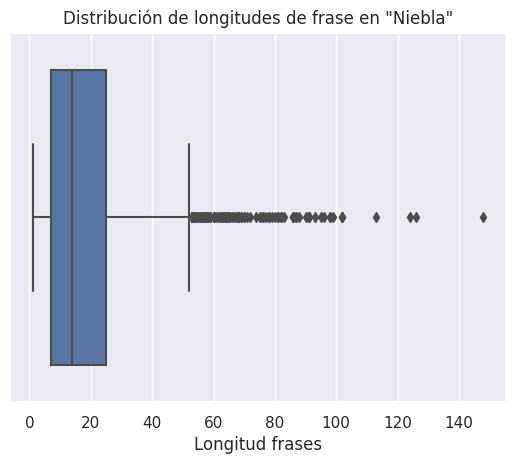

In [35]:
plot = sns.boxplot(data=df_niebla, x="Longitud frases")
plot.set_title('Distribución de longitudes de frase en "Niebla"')

# Además lo guardamos en un fichero
# plot.get_figure().savefig("boxplot_long_frases_niebla.pdf")

#### __Ejemplo adicional__: Diagrama de cajas de varios libros a la vez

Text(0.5, 1.0, 'Distribución de longitudes de frase')

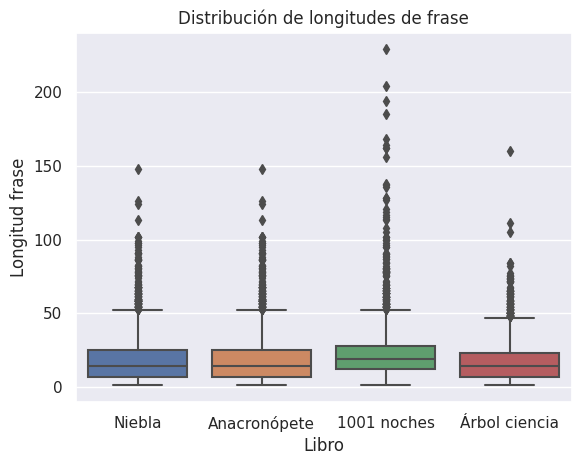

In [36]:
# Cambiamos los ejes X e Y para mostrar las cajas en vertical
plot = sns.boxplot(data=df_long_frases, x="Libro", y="Longitud frase")
plot.set_title('Distribución de longitudes de frase')

# Además lo guardamos en un fichero
# plot.get_figure().savefig("boxplot_long_frases.pdf")

### Diagrama de barras apiladas de proporciones de categorías gramaticales

In [37]:
# Ejemplo 6.7.11
# Diagrama de barras apiladas de proporciones de categorías gramaticales

# Creamos una tabla con una fila por cada libro donde las columnas 
# almacenen los valores de proporción de algunas categorías gramaticales:
# - pos_prop_NOUN
# - pos_prop_VERB
# - pos_prop_ADJ
# - pos_prop_PUNCT

datos = [[niebla._.pos_proportions['pos_prop_NOUN'],
          niebla._.pos_proportions['pos_prop_VERB'],
          niebla._.pos_proportions['pos_prop_ADJ'],
          niebla._.pos_proportions['pos_prop_PUNCT']],
         
         [anacronopete._.pos_proportions['pos_prop_NOUN'],
          anacronopete._.pos_proportions['pos_prop_VERB'],
          anacronopete._.pos_proportions['pos_prop_ADJ'],
          anacronopete._.pos_proportions['pos_prop_PUNCT']],
         
         [mil_noches._.pos_proportions['pos_prop_NOUN'],
          mil_noches._.pos_proportions['pos_prop_VERB'],
          mil_noches._.pos_proportions['pos_prop_ADJ'],
          mil_noches._.pos_proportions['pos_prop_PUNCT']],
         
         [arbol_ciencia._.pos_proportions['pos_prop_NOUN'],
          arbol_ciencia._.pos_proportions['pos_prop_VERB'],
          arbol_ciencia._.pos_proportions['pos_prop_ADJ'],
          arbol_ciencia._.pos_proportions['pos_prop_PUNCT']],
        ]
indices = ['Niebla', 'Anacronópete', '1001 noches', 'Árbol de la ciencia' ]
df_proporciones = pd.DataFrame(datos, 
                    columns =['Nombres', 'Verbos', 'Adjetivos', 'Puntuación'],
                    index=indices)
df_proporciones

# Para almacenar tabla como PNG
# dfi.export(df_proporciones, "df_proporciones.png", dpi=300)

,Nombres,Verbos,Adjetivos,Puntuación
Niebla,0.109690,0.107764,0.036725,0.199529
Anacronópete,0.181007,0.098698,0.054778,0.099045
1001 noches,0.147312,0.119337,0.036572,0.161388
Árbol de la ciencia,0.156404,0.100740,0.053958,0.130328


Text(0.5, 1.0, 'Proporción por categoría gramatical')

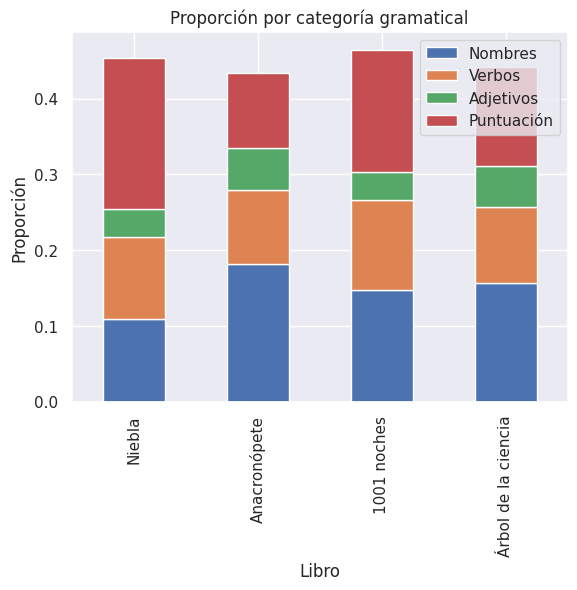

In [39]:
# Crear el gráfico de barras apiladas directamente a partir 
# del DataFrame (sin usar Seaborn)
plot = df_proporciones.plot(kind='bar', stacked=True)

# Configuramos etiquetas de ejes y título
plot.set(xlabel = 'Libro')
plot.set(ylabel = 'Proporción')
plot.set_title('Proporción por categoría gramatical')

# Además lo guardamos en un fichero
# plot.get_figure().savefig("barras_apiladas_cat_gramaticales.pdf",
#                           bbox_inches='tight') # Para que no recorte